In [112]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Simulate TikTok engagement data collection
def generate_tiktok_data(num_users=1000): # function to generate random engagement data for 1,000 users
    data = []
    for user_id in range(1, num_users + 1):
        age = random.randint(13, 50)
        is_active = random.choice([True, False])
        engagement_rate = round(random.uniform(0.01, 0.1), 2) if is_active else 0
        content_likes = random.randint(0, 500) if is_active else 0
        content_posts = random.randint(0, 100) if is_active else 0
        last_activity = datetime.now() - timedelta(days=random.randint(0, 365))

        data.append({
            'user_id': user_id,
            'age': age,
            'is_active': is_active,
            'engagement_rate': engagement_rate,
            'content_likes': content_likes,
            'content_posts': content_posts,
            'last_activity': last_activity
        })
    return pd.DataFrame(data)

# Simulate data
tiktok_data = generate_tiktok_data()


# Save the simulated data to a CSV file
tiktok_data.to_csv('simulated_tiktok_engagement_data.csv', index=False)


***generate_tiktok_data(num_users=1000):***

This function generates random engagement data for 1,000 users (or any specified number).
For each user, it randomly generates:
age (between 13 and 50),
is_active (whether the user is active or not),
engagement_rate (if active, between 0.01 and 0.1),
content_likes (number of likes, if active),
content_posts (number of posts, if active),
last_activity (a random date within the past year).
Create and store data:

It stores the data in a Pandas DataFrame.
The data is saved to a CSV file called 'simulated_tiktok_engagement_data.csv'.

***inactive_threshold*** represents threshold of 180 days (6 months) to define inactive accounts from current date.

***abandoned_accounts*** extracts rows from the tiktok_data DataFrame where:
The last_activity is earlier than the threshold (i.e., no activity for over 6 months),

***is_active*** is False (user is not currently active).

Group abandoned accounts by age:

***abandoned_age_group*** groups these abandoned accounts by age using groupby('age'), counts how many users belong to each age group, and stores the result.

The output shows how many abandoned accounts exist for each age group.

In [113]:
# Basic data info
tiktok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1000 non-null   int64         
 1   age              1000 non-null   int64         
 2   is_active        1000 non-null   bool          
 3   engagement_rate  1000 non-null   float64       
 4   content_likes    1000 non-null   int64         
 5   content_posts    1000 non-null   int64         
 6   last_activity    1000 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 48.0 KB


In [114]:
# Displaying first 5 rows
tiktok_data.head()

,user_id,age,is_active,engagement_rate,content_likes,content_posts,last_activity
0,1,50,False,0.0,0,0,2023-12-06 17:16:36.104663
1,2,36,False,0.0,0,0,2023-10-30 17:16:36.104684
2,3,23,False,0.0,0,0,2024-01-29 17:16:36.104691
3,4,18,False,0.0,0,0,2024-07-11 17:16:36.104699
4,5,18,False,0.0,0,0,2023-11-01 17:16:36.104705


In [115]:
# checking datatypes
tiktok_data.dtypes

,0
user_id,int64
age,int64
is_active,bool
engagement_rate,float64
content_likes,int64
content_posts,int64
last_activity,datetime64[ns]


# **DATA CLEANING**

In [116]:
# checking missing values
tiktok_data.isnull().sum()

,0
user_id,0
age,0
is_active,0
engagement_rate,0
content_likes,0
content_posts,0
last_activity,0


no null values detected.

In [117]:
# Check for duplicate rows
tiktok_data.duplicated().sum()

0

no duplicated data detected.

<Axes: xlabel='engagement_rate'>

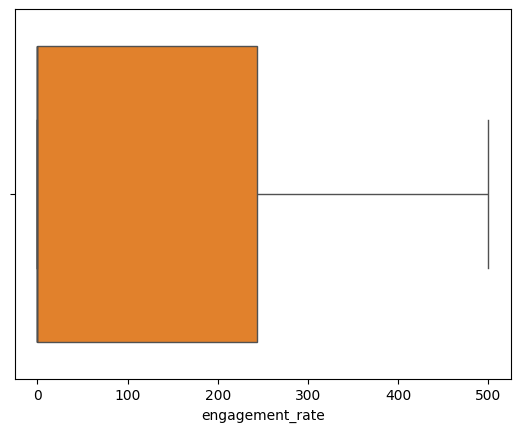

In [118]:
import seaborn as sns

# Plot box plots to identify outliers
sns.boxplot(x=tiktok_data['engagement_rate'])
sns.boxplot(x=tiktok_data['content_likes'])


no outliers detected.


In [119]:
# Function to update the dataset with new records
def update_tiktok_data(existing_data, new_data):
    updated_data = pd.concat([existing_data, new_data]).drop_duplicates(subset='user_id', keep='last')
    return updated_data

# Simulate new TikTok data (100 new users)
new_tiktok_data = generate_tiktok_data(num_users=100)

# Update the dataset with new data
updated_data = update_tiktok_data(tiktok_data, new_tiktok_data)

print("Dataset updated successfully")


Dataset updated successfully


***update_tiktok_data(existing_data, new_data):*** function takes two DataFrames (existing_data and new_data). It concatenates the existing data with the new data. It removes duplicate entries by ***user_id***, keeping only the most recent ***(keep='last'***).

***generate_tiktok_data(num_users=100)*** generates data for 100 new users.



The ***update_tiktok_data*** function updates the original tiktok_data by appending the new data and removing any duplicate user records.
Output:

A message is printed to confirm that the dataset has been updated.

# **FEATURE ENGINEERING**

In [120]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create age intervals
age_bins = [13, 20, 30, 40, 50]
age_labels = ['13-20', '21-30', '31-40', '41-50']
tiktok_data['age_group'] = pd.cut(tiktok_data['age'], bins=age_bins, labels=age_labels)

# Select features for clustering
X = tiktok_data[['engagement_rate', 'content_likes']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
tiktok_data['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


***pd.cut*** creates a new column ***age_group*** in ***tiktok_data*** that categorizes ages into the defined intervals.

***X*** is a DataFrame containing the features ***engagement_rate*** and ***content_likes*** used for clustering.

**KMeans clustering:**

Applied KMeans algorithm with 3 clusters (***n_clusters=3***) to group the users based on their ***engagement rate*** and ***content likes***.
The resulting cluster labels are assigned to a new column in ***tiktok_data*** called ***cluster***.


***Cluster analysis:***

It groups the data by ***cluster*** and ***age***, calculating the mean ***engagement rate*** and ***content likes*** for each combination.
The results are printed, showing how user behavior in each cluster differs across age groups.


# VISUALIZATION

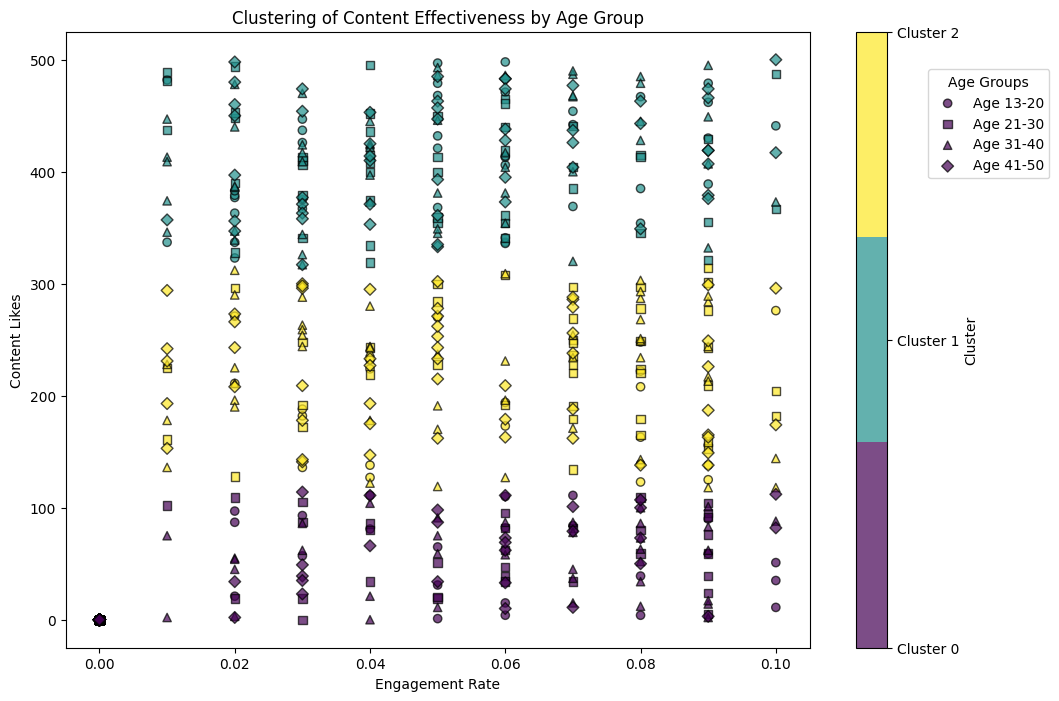

In [121]:
# Define marker styles for each age group
markers = {'13-20': 'o', '21-30': 's', '31-40': '^', '41-50': 'D'}

# Define a colormap for clusters
cmap = plt.get_cmap('viridis', 3)  # 3 clusters

# Plot scatter plot with clusters as colors and age groups as markers
plt.figure(figsize=(12, 8))

# Loop through age groups and plot
for age_group, marker in markers.items():
    subset = tiktok_data[tiktok_data['age_group'] == age_group]
    scatter = plt.scatter(subset['engagement_rate'], subset['content_likes'],
                          c=subset['cluster'], label=f'Age {age_group}',
                          marker=marker, cmap=cmap, alpha=0.7, edgecolor='k')

# Add a colorbar for clusters
cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_label('Cluster')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.xlabel('Engagement Rate')
plt.ylabel('Content Likes')
plt.title('Clustering of Content Effectiveness by Age Group')
plt.legend(title="Age Groups", bbox_to_anchor=(1.15, 0.95), loc='upper left')
plt.show()

***markers:*** dictionary maps each age group to a specific marker style.

***cmap:*** creates a colormap using ***viridis*** colormap with 3 distinct colors, one for each cluster.

Key Observations:

Cluster Differences: There appears to be a difference in the overall content likes and engagement rates between the clusters. Cluster 2 seems to have higher overall engagement and content likes compared to Cluster 0 and Cluster 1.
Age Group Variations: Within each cluster, there are variations in content likes and engagement rates across different age groups. For example, in Cluster 2, the age group 21-30 might have a higher average content likes and engagement rate than the age group 13-20.
Outliers: A few data points (outliers) seem to deviate significantly from the general trend within their respective clusters. These could be particularly popular or unpopular pieces of content.
Identifying Effective Content and Timing:

Based on the plot, here are some potential strategies for creating effective content and timing it for each demographic:

Cluster 2:

Content: Focus on content that is highly engaging and likely to generate a large number of likes. Consider topics or formats that resonate with this cluster.
Timing: Experiment with different posting times to see when content from this cluster receives the most engagement.
Cluster 1:

Content: While engagement and content likes are lower in Cluster 1 compared to Cluster 2, focus on creating content that is relevant and interesting to this demographic.
Timing: Try posting content during times when members of Cluster 1 are most active online.
Cluster 0:

Content: Tailor content to the specific interests and preferences of this cluster. Consider niche topics or formats that might appeal to them.
Timing: Experiment with different posting times to find the optimal time for reaching this demographic.

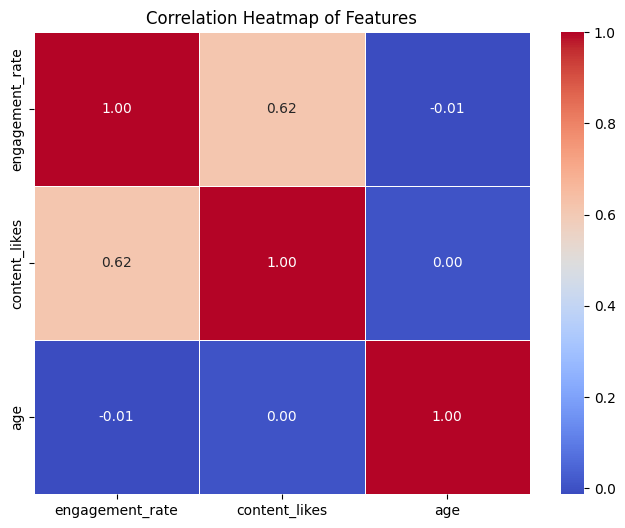

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = tiktok_data[['engagement_rate', 'content_likes', 'age']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


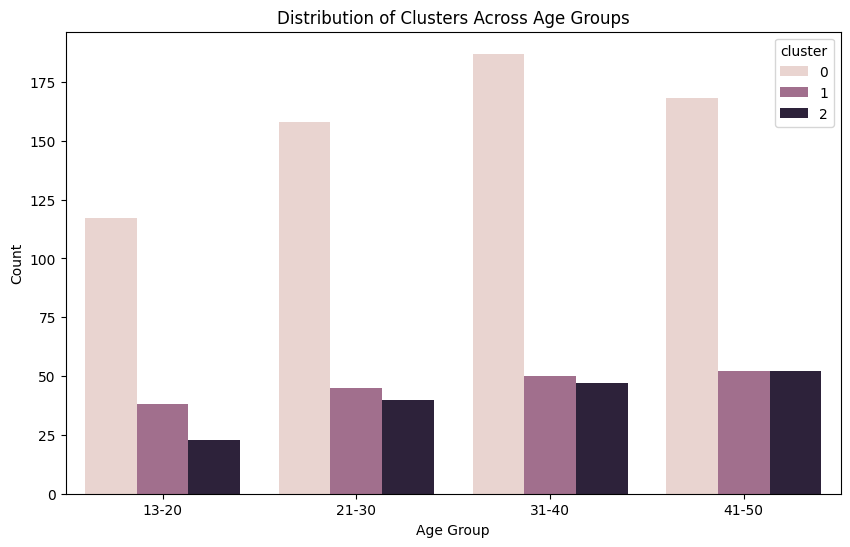

In [123]:
# Distribution of clusters across age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=tiktok_data, x='age_group', hue='cluster')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Clusters Across Age Groups')
plt.show()